In [385]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split

In [386]:
data = pd.read_csv('bird.csv')

## question1

In [387]:
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


## question2

In [388]:
data=data.drop_duplicates()
data = data.dropna()
data['type'].value_counts

<bound method IndexOpsMixin.value_counts of 0      SW
1      SW
2      SW
3      SW
4      SW
       ..
415    SO
416    SO
417    SO
418    SO
419    SO
Name: type, Length: 413, dtype: object>

## question 3

In [389]:
#affiche tout les type de données présent
data['type'].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [390]:
#créer x contenant les colonnes et y contenant les lignes 
x,y = data.drop(columns='type'), data['type']

In [391]:

#67% de x dans xtrain et de y dans ytrain le reste dans xtest ytest
xTrain, xTest, yTrain, yTest= train_test_split(x,y, test_size=0.33, random_state=0)

In [392]:
"xTrain =",len(xTrain), "xTest =", len(xTest), "yTrain =", len(yTrain), "yTest =", len(yTest)


('xTrain =', 276, 'xTest =', 137, 'yTrain =', 276, 'yTest =', 137)

In [393]:
ct_train = yTrain.value_counts()
ct_test = yTest.value_counts()
result = pd.DataFrame({
    'train' : ct_train,
    'test' : ct_test,
    '%train' : (ct_train/y.value_counts() * 100),
    '%test' : (ct_test/y.value_counts() * 100)
})
result


,train,test,%train,%test
P,25,13,65.789474,34.210526
R,32,16,66.666667,33.333333
SO,84,40,67.741935,32.258065
SW,75,41,64.655172,35.344828
T,16,7,69.565217,30.434783
W,44,20,68.750000,31.250000


## Partie 3

In [394]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)
y_pred_knn = knn.predict(xTest)
knn.score(xTest, yTest)


0.9927007299270073

## Question 2

In [395]:
from sklearn.metrics import confusion_matrix

yUnique = y.unique()
conf = confusion_matrix(yTest, y_pred_knn, labels=yUnique)
conf

array([[41,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0],
       [ 0,  0,  0, 15,  1,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 40]], dtype=int64)

<AxesSubplot:>

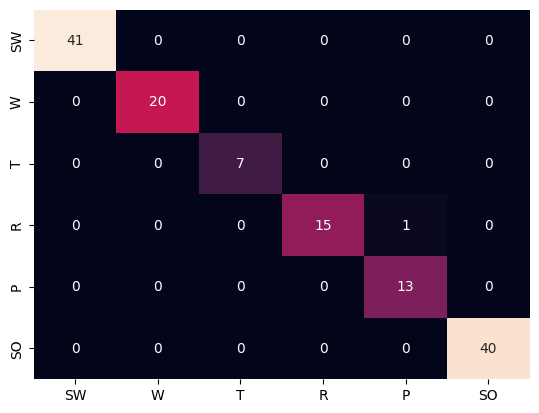

In [396]:
import seaborn as sns
sns.heatmap(conf, annot= True, cbar=False, xticklabels=yUnique, yticklabels=yUnique)

In [397]:
yTest.value_counts()

SW    41
SO    40
W     20
R     16
P     13
T      7
Name: type, dtype: int64

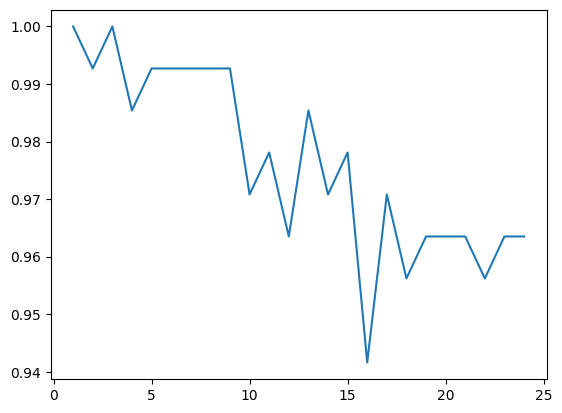

In [398]:
import matplotlib.pyplot as plt
score=[]
for n in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(xTrain, yTrain)
    score.append(knn.score(xTest, yTest))
plt.plot(range(1,25), score)

In [399]:
yTest

381    SO
171     W
233     R
333    SO
339    SO
       ..
303    SO
92     SW
242     R
195     T
382    SO
Name: type, Length: 137, dtype: object

In [400]:
from sklearn.svm import SVC

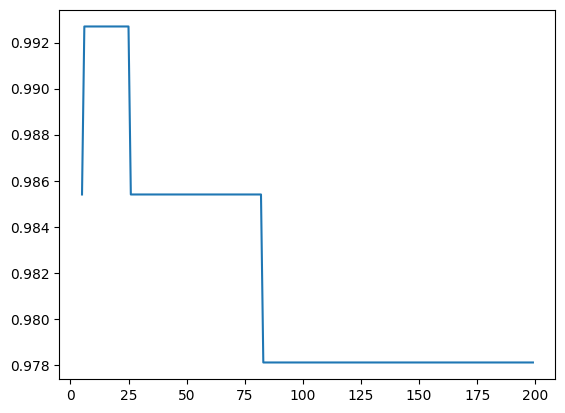

In [414]:
score=[]
for n in range(5,200):
    svc = SVC(C=n)
    svc.fit(xTrain, yTrain)
    score.append(svc.score(xTest, yTest))
plt.plot(range(5,200), score)